In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
X_train = pd.read_csv("/Users/panzichen/Columbia Term2 Courses/ML for DS/HW1/hw1-data/X_train.csv", header = None)
y_train = pd.read_csv("/Users/panzichen/Columbia Term2 Courses/ML for DS/HW1/hw1-data/y_train.csv", header = None)
X_test = pd.read_csv("/Users/panzichen/Columbia Term2 Courses/ML for DS/HW1/hw1-data/X_test.csv", header = None)
y_test = pd.read_csv("/Users/panzichen/Columbia Term2 Courses/ML for DS/HW1/hw1-data/y_test.csv", header = None)

In [3]:
print(len(X_train),len(y_train), len(X_test), len(y_test))

350 350 42 42


In [4]:
X = X_train.values
y = y_train.values
y.shape

(350, 1)

# a, b

In [5]:
# using trace
w_RR = np.zeros(shape = (5001,7))
df = np.zeros(shape = (5001,1))
for lamda in range(5001):
    w = np.linalg.inv(lamda * np.identity(X.shape[1]) + X.transpose().dot(X)).dot(X.transpose()).dot(y)
    df_lamda = np.trace(X.dot(np.linalg.inv(lamda * np.identity(X.shape[1]) + X.transpose().dot(X))).dot(X.transpose()))
    w_RR[lamda] = w.reshape(7)
    df[lamda] = df_lamda

In [6]:
w_RR_plot = np.concatenate((w_RR, df), axis = 1)

In [7]:
w_RR_df = pd.DataFrame(w_RR_plot)
w_RR_df.columns = ['cylinders','displacement','horsepower','weight',
                   'acceleration','year made','intercept', 'df_lamda']
w_RR_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year made,intercept,df_lamda
0,-0.456261,0.730167,-0.284619,-5.585589,0.289578,2.781398,0.010157,7.000000
1,-0.445724,0.577767,-0.344497,-5.409686,0.251106,2.763335,0.008127,6.850483
2,-0.441310,0.445740,-0.399178,-5.250289,0.216905,2.746405,0.006363,6.715540
3,-0.441428,0.330217,-0.449200,-5.104980,0.186371,2.730449,0.004816,6.592778
4,-0.444919,0.228253,-0.495043,-4.971818,0.159010,2.715338,0.003450,6.480326


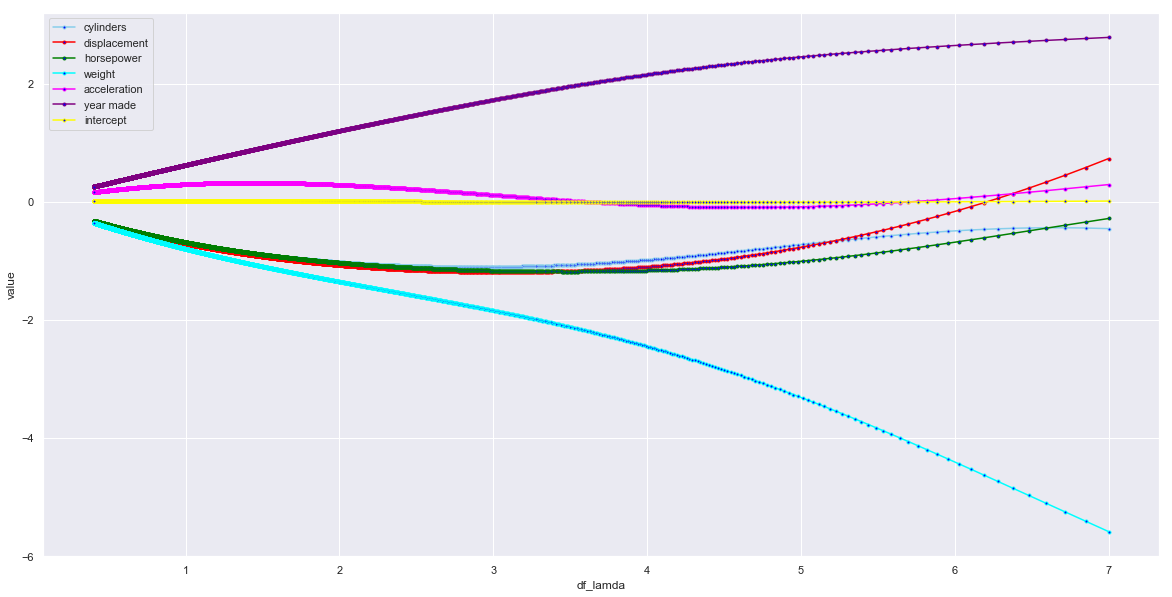

In [8]:
plt.figure(figsize=(20,10))
plt.plot('df_lamda', 'cylinders', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='skyblue')
plt.plot('df_lamda', 'displacement', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='red')
plt.plot('df_lamda', 'horsepower', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='green')
plt.plot('df_lamda', 'weight', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='cyan')
plt.plot('df_lamda', 'acceleration', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='magenta')
plt.plot('df_lamda', 'year made', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='purple')
plt.plot('df_lamda', 'intercept', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='yellow')
_ = plt.legend()
_ = plt.xlabel('df_lamda')
_ = plt.ylabel('value')

In [9]:
## Two dimensions clearly stand out over the others are weight and year made. They are sensitive to the change of
# lamda, which means their coefficient can be large in linear regression and easy to make the model overfit.

In [10]:
# using SVD
w_RR = np.zeros(shape = (5001,7))
df = np.zeros(shape = (5001,1))
for lamda in range(5001):
    w = np.linalg.inv(lamda * np.identity(X.shape[1]) + X.transpose().dot(X)).dot(X.transpose()).dot(y)
    u, s, vh = np.linalg.svd(X, full_matrices=True)
    df_lamda = 0
    for i in range(7):
        df_lamda += (s[i] ** 2) / (lamda + (s[i] ** 2))
    w_RR[lamda] = w.reshape(7)
    df[lamda] = df_lamda

w_RR_plot = np.concatenate((w_RR, df), axis = 1)

w_RR_df = pd.DataFrame(w_RR_plot)
w_RR_df.columns = ['cylinders','displacement','horsepower','weight',
                   'acceleration','year made','intercept', 'df_lamda']
w_RR_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year made,intercept,df_lamda
0,-0.456261,0.730167,-0.284619,-5.585589,0.289578,2.781398,0.010157,7.000000
1,-0.445724,0.577767,-0.344497,-5.409686,0.251106,2.763335,0.008127,6.850483
2,-0.441310,0.445740,-0.399178,-5.250289,0.216905,2.746405,0.006363,6.715540
3,-0.441428,0.330217,-0.449200,-5.104980,0.186371,2.730449,0.004816,6.592778
4,-0.444919,0.228253,-0.495043,-4.971818,0.159010,2.715338,0.003450,6.480326


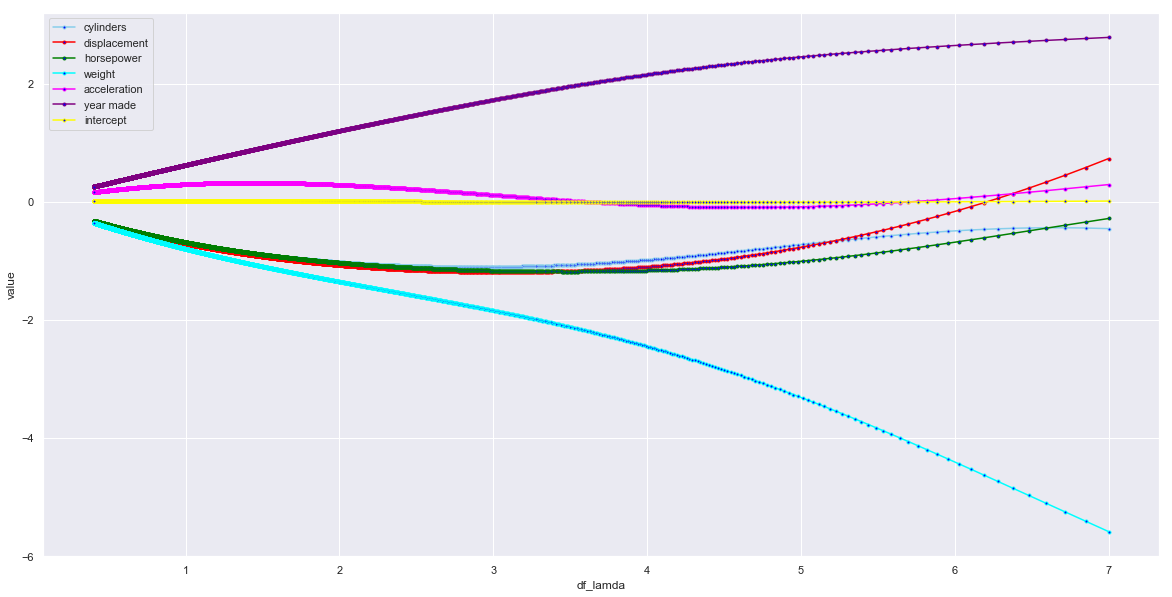

In [11]:
plt.figure(figsize=(20,10))
plt.plot('df_lamda', 'cylinders', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='skyblue')
plt.plot('df_lamda', 'displacement', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='red')
plt.plot('df_lamda', 'horsepower', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='green')
plt.plot('df_lamda', 'weight', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='cyan')
plt.plot('df_lamda', 'acceleration', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='magenta')
plt.plot('df_lamda', 'year made', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='purple')
plt.plot('df_lamda', 'intercept', marker='o', markerfacecolor='blue', markersize=3, data=w_RR_df, color='yellow')
_ = plt.legend()
_ = plt.xlabel('df_lamda')
_ = plt.ylabel('value')

# c

In [12]:
# polynomial p=1
from sklearn.metrics import mean_squared_error
from math import sqrt

lamda_array = np.zeros(shape = (51,1))
RMSE_array = np.zeros(shape = (51,1))
for lamda in range(51):
    w = np.linalg.inv(lamda * np.identity(X.shape[1]) + X.transpose().dot(X)).dot(X.transpose()).dot(y)
    y_pred = X_test.values.dot(w)
    RMSE = sqrt(mean_squared_error(y_pred, y_test.values))
    RMSE_array[lamda] = RMSE
    lamda_array[lamda] = lamda


In [13]:
RMSE_plot = np.concatenate((lamda_array, RMSE_array), axis = 1)

In [14]:
RMSE_df = pd.DataFrame(RMSE_plot)
RMSE_df.columns = ['lamda', 'RMSE']
RMSE_df.head()

,lamda,RMSE
0,0.0,2.633644
1,1.0,2.645059
2,2.0,2.656118
3,3.0,2.666752
4,4.0,2.676932


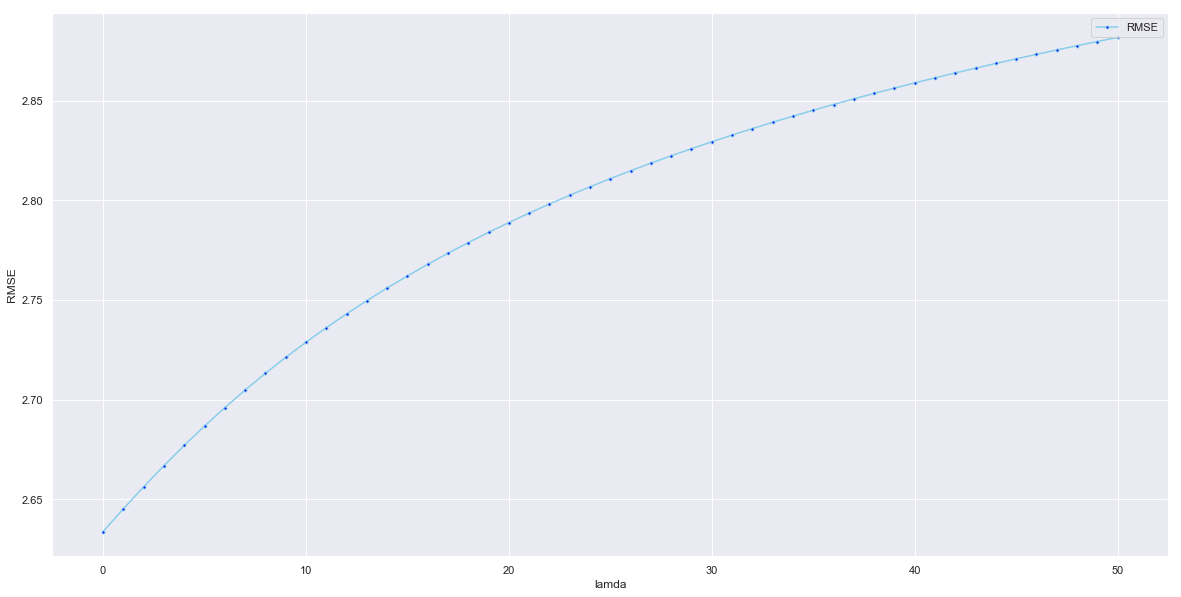

In [15]:
plt.figure(figsize=(20,10))
plt.plot('lamda', 'RMSE', marker='o', markerfacecolor='blue', markersize=3, data=RMSE_df, color='skyblue')
_ = plt.legend()
_ = plt.xlabel('lamda')
_ = plt.ylabel('RMSE')

In [16]:
# We cannot choose too large or too small lamda. 
# If lamda is too large, as lamda rises, RMSE of out-of-sample data also increases.
# If lamda is too small, coefficeint of some features may be large.

# d

In [17]:
X.shape

(350, 7)

In [18]:
# polynomial p=1
from sklearn.metrics import mean_squared_error
from math import sqrt

lamda_array = np.zeros(shape = (101,1))
RMSE_array = np.zeros(shape = (101,1))
for lamda in range(101):
    w = np.linalg.inv(lamda * np.identity(X.shape[1]) + X.transpose().dot(X)).dot(X.transpose()).dot(y)
    y_pred = X_test.values.dot(w)
    RMSE = sqrt(mean_squared_error(y_pred, y_test.values))
    RMSE_array[lamda] = RMSE
    lamda_array[lamda] = lamda

In [19]:
RMSE_plot = np.concatenate((lamda_array, RMSE_array), axis = 1)
RMSE_df = pd.DataFrame(RMSE_plot)
RMSE_df.columns = ['lamda', 'RMSE']
RMSE_df.head()

,lamda,RMSE
0,0.0,2.633644
1,1.0,2.645059
2,2.0,2.656118
3,3.0,2.666752
4,4.0,2.676932


In [20]:
# polynomial p=2
import pprint

X_test_2 = np.zeros(shape = (42, 13))
X_2 = np.zeros(shape = (350, 13))
X_2[:, 0:7] = X
X_test_2[:, 0:7] = X_test.values
for i in range(6):
    X_2[:, 7+i] = (X_2[:, i]) ** 2
    standard_mean = np.mean(X_2[:, 7+i])
    standard_std = np.std(X_2[:, 7+i])
    X_2[:, 7+i] = (X_2[:, 7+i] - standard_mean) / standard_std
    X_test_2[:, 7+i] = (X_test_2[:, i]) ** 2
    X_test_2[:, 7+i] = (X_test_2[:, 7+i] - standard_mean) / standard_std

In [21]:
# polynomial p=2

RMSE_array_2 = np.zeros(shape = (101,1))
for lamda in range(101):
    w = np.linalg.inv(lamda * np.identity(X_2.shape[1]) + X_2.transpose().dot(X_2)).dot(X_2.transpose()).dot(y)
    y_pred = X_test_2.dot(w)
    RMSE = sqrt(mean_squared_error(y_pred, y_test.values))
    RMSE_array_2[lamda] = RMSE
RMSE_plot = np.array(RMSE_plot)
RMSE_plot = np.concatenate((RMSE_plot, RMSE_array_2), axis = 1)
RMSE_df = pd.DataFrame(RMSE_plot)
RMSE_df.columns = ['lamda', 'RMSE_p=1','RMSE_p=2']

In [22]:
# polynomial p=3
import pprint
import math

X_test_3 = np.zeros(shape = (42, 19))
X_3 = np.zeros(shape = (350, 19))
X_3[:, 0:13] = X_2
X_test_3[:, 0:13] = X_test_2
for i in range(6):
    X_3[:, 13+i] = (X_3[:, i]) ** 3
    standard_mean = np.mean(X_3[:, 13+i])
    standard_std = np.std(X_3[:, 13+i])
    X_3[:, 13+i] = (X_3[:, 13+i] - standard_mean) / standard_std
    X_test_3[:, 13+i] = (X_test_3[:, i]) ** 3
    X_test_3[:, 13+i] = (X_test_3[:, 13+i] - standard_mean) / standard_std

In [23]:
# polynomial p=3

RMSE_array_3 = np.zeros(shape = (101,1))
for lamda in range(101):
    w = np.linalg.inv(lamda * np.identity(X_3.shape[1]) + X_3.transpose().dot(X_3)).dot(X_3.transpose()).dot(y)
    y_pred = X_test_3.dot(w)
    RMSE = sqrt(mean_squared_error(y_pred, y_test.values))
    RMSE_array_3[lamda] = RMSE
RMSE_plot = np.array(RMSE_plot)
RMSE_plot = np.concatenate((RMSE_plot, RMSE_array_3), axis = 1)
RMSE_df = pd.DataFrame(RMSE_plot)
RMSE_df.columns = ['lamda', 'RMSE_p=1','RMSE_p=2','RMSE_p=3']
RMSE_df.head()

,lamda,RMSE_p=1,RMSE_p=2,RMSE_p=3
0,0.0,2.633644,2.341274,2.293578
1,1.0,2.645059,2.324655,2.281444
2,2.0,2.656118,2.309714,2.273368
3,3.0,2.666752,2.296107,2.265440
4,4.0,2.676932,2.283619,2.257195


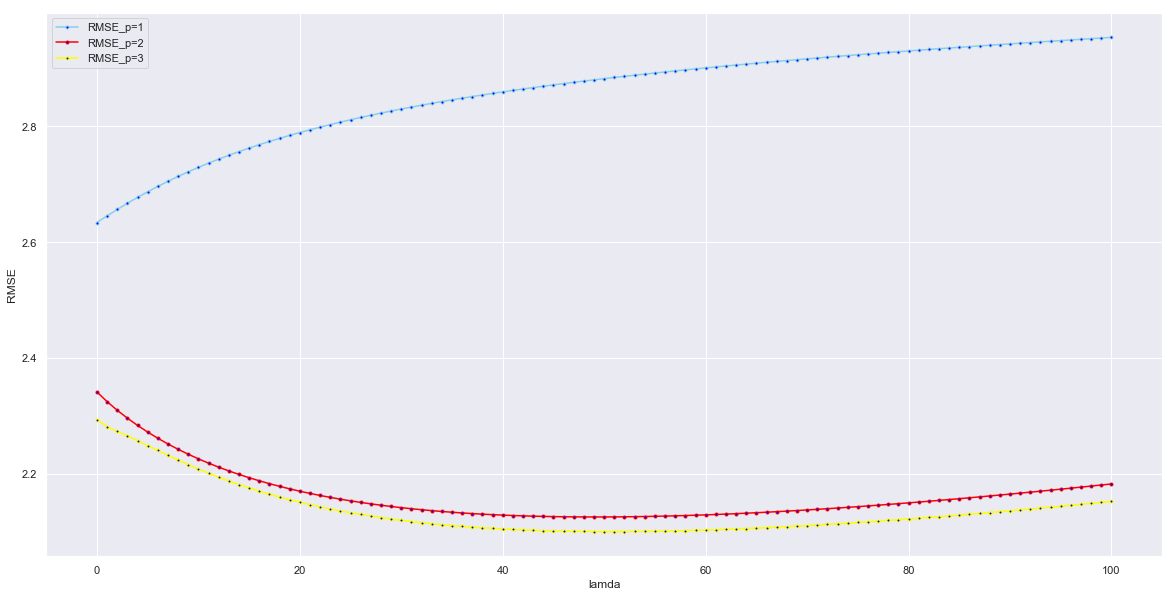

In [24]:
plt.figure(figsize=(20,10))
plt.plot('lamda', 'RMSE_p=1', marker='o', markerfacecolor='blue', markersize=3, data=RMSE_df, color='skyblue')
plt.plot('lamda', 'RMSE_p=2', marker='o', markerfacecolor='blue', markersize=3, data=RMSE_df, color='red')
plt.plot('lamda', 'RMSE_p=3', marker='o', markerfacecolor='blue', markersize=3, data=RMSE_df, color='yellow')
_ = plt.legend()
_ = plt.xlabel('lamda')
_ = plt.ylabel('RMSE')